<center><h2>CMPS242 - Homework \#03</h2>
    <h3>Andrew Stolman, Benjamin Sherman, & Zayd Hammoudeh</h3></center>
    
<b>Homework Goal</b>: Develop a learner that can classify SMS messages as spam or ham (i.e., not spam).

The following steps in the Jupyter notebook should be run sequentially.

<h3>Program Requirements:</h3>
<ul>
    <li>Python 2.7.12 - Standard distribution</li>
    <li>Packages: Natural Language Toolkit (nltk), Scikit-Learn (sklearn), pandas, NumPy, ipywidgets, IPython.display, and matplotlib</li>
    <li>Running the following on the command line enables Jupyter widgets: <pre>jupyter nbextension enable --py widgetsnbextension</pre></li>
</ul>

<h3><b>Step \#1</b>: Parse the source data.</h3>

The first stage in this step is to import and clean the data for tokenization. 
<ol>
    <li>Import CSV</li>
    <li>Remove invalid characters</li>
    <li>Remove all punctuation</li>
    <li>Make the strings all lowercase.</li>
    <li>Remove stop words</li>
</ol>

Tokenization is performed first on the training set.  The words in training set will be the <b>vocabulary</b> for the test set.  This step is required since new words in the testing set will not have associated weights.

After tokenization, term frequency-inverse document frequency (TF-IDF) is performed.  TF-IDF is defined as:

<center>$\text{TF-IDF}(d,t) = Tf(d,t) \cdot IDF(t)$</center>
 
Term frequency ($Tf$) is the number of times a specified term, $t$, appears in a document $d$.  Similarly, given a corpus of $n$ documents, the <b>document frequency</b> ($df$) is the number of documents that contain term $t$.  It is formally defined as:

<center>$IDF(t)= \ln \left( \frac{n+1}{df(t) + 1} \right)  + 1$</center>

Note that the additional of $1$ in the numerator and denominator is a smoothing factor.  Since we are restricting the test set to the training set's vocabulary, its benefit is limited.  However, we included it nonetheless.

The Python packages in this step are:
<ul>
    <li><b>Pandas</b>: Used to import from CSV and for organizaing results in the for use of the data frame object.</li>
    <li><b>NLTK</b> (Natural Language Toolkit): This provides a list of stop words (i.e., common words like "the", "or", "end", etc. that individually add little context or value).</li>
    <li><b>Scikit-Learn</b>: This is used for string tokenization and TF-IDF.</li>
    <li><b>NumPy</b>: This is the return type of the function.</li>
</ul>

In [1]:
import input_parser
train_data, test_data = input_parser.parse()

Number of Training Samples: 3000
Number of Test Samples: 2572


<h3>Step \#2: Configure and run the learner.</h3>

Once the data structures have been built, we are ready to run the learning algorithm.  For convenience, we have added the feature that allows you to modify the Python settings via on screen widgets.  Once the settings are acceptable, click the "Run Learner" button to visualize the graphs.

The Python packages used in step are:
<ul>
    <li>ipywidgets</li>
    <li>IPython.display</li>
</ul>

In [3]:
from widgets import *
display(k_hbox, learning_alg_hbox, learning_rate_hbox, lambdas_range_hbox, run_button)

<IPython.core.display.Javascript object>

HBox(children=(Label(value=u'Number of Folds: '), IntSlider(value=10, continuous_update=False, max=20, min=2)))

HBox(children=(Label(value=u'Select Learning Algorithm: '), RadioButtons(options=('Gradient Descent', 'EG+/-'), value='Gradient Descent')))

HBox(children=(Label(value=u'Learning Rate ($\\eta$): '), FloatSlider(value=1.0, max=1.0, min=0.01, step=0.01)))

HBox(children=(Label(value=u'Range of $\\lambda$ in Form $2^{x}$: '), IntRangeSlider(value=(-3, 4), max=5, min=-5)))

Button(description=u'Run Learner', icon=u'check', style=ButtonStyle(), tooltip=u'Run Learning Algorithm with the specified paramters')

<h3>Step \#3: Run the Learner</h3>

Once all of the learning parameters have been configured and clicked the "Run Learner" button, the learner will run.  It will then plot the results.

In [4]:
from run_learner import run_hw03
train_err, validation_err, test_err = run_hw03(train_data, test_data)

Starting Learner.
Learner complete.


<h3>Step \#4: Visualize the Outputs</h3>

Below is a table showing the results and plots.

To generate the graph and table visualizations, run the cell below and then click the "<b>Update Results</b>" button.

In [5]:
from widgets import *
display(update_results_button)

Button(description=u'Update Results', icon=u'check', style=ButtonStyle(), tooltip=u'Update the table and graph')

<h4>Step \#4a: Table of the Results</h4>

In [6]:
from table_builder import create_table
create_table(train_err, validation_err, test_err)

,0,1,2,3,4,5,6,7,8
$\lambda$,0,$2^{-3}$,$2^{-2}$,$2^{-1}$,$2^{0}$,$2^{1}$,$2^{2}$,$2^{3}$,$2^{4}$
Training,0.0759,0.0463,0.0315,0.0012,0.0040,0.0132,0.0220,0.0360,0.0920
Validation,0.2421,0.2335,0.2333,0.2249,0.2077,0.2018,0.2007,0.2014,0.2251
Test,0.2124,0.2073,0.2049,0.2031,0.1912,0.1811,0.1809,0.1817,0.1848


<h4>Step \#4b: Graph of the Results</h4>

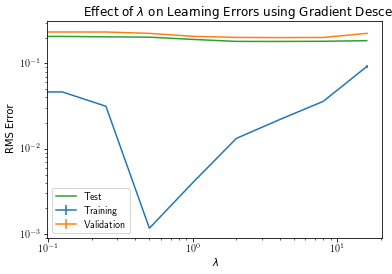

In [7]:
import plotter
plotter.create_plots(train_err, validation_err, test_err)